# **DSCI 100 Project: Draft Work**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Players Dataset #

In [2]:
players <- read_csv("players.csv")
players

# How many people are present in this dataframe? (Just double checking): 196
players |>
    group_by(name) |>
    summarize(count = n())

# How many players have played for 0 hours: 85   
players |>
    filter(played_hours == 0.0)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


name,count
<chr>,<int>
Aarav,1
Aaron,1
Adrian,1
⋮,⋮
Zelda,1
Ziad,1
Zoe,1


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0,Blake,Male,17
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0,Luna,Female,19
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0,Bailey,Female,17
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0,Dylan,Prefer not to say,17


**Description:**

The dataset consists of data for MineCraft video game players of different ages with varying levels of experience in gaming and number of hours played.  The logistics of their name, gender, (age), email and whether they have subscribed to the newsletter have been recorded.  There are 7 variables and 196 observations in the dataset.

**Outcome Variable:**
The main outcome/categorical/label variable in the dataset is the 'subscribe' variable which describes whether or not a player has subscribed to the Minecraft newsletter.  Thus, there are two groups within the category: "TRUE" or "FALSE".  We can double check using the distinct function below.


In [3]:
players |>
    distinct(subscribe)

subscribe
<lgl>
TRUE
FALSE


To determine the number of observations in each group of "TRUE" or "FALSE", we can group the observations according to the 'subscribe' variable and summarize the number of counts or observations in each group.

In [4]:
players |>
    group_by(subscribe) |>
    summarize(count = n())

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


From the tibble above, we can see that there are 144 players who have subscribed to the gaming newsletter but 52 players who have not done so yet.

## Compare the the Number of Players of different experiences that have subscribed or not:

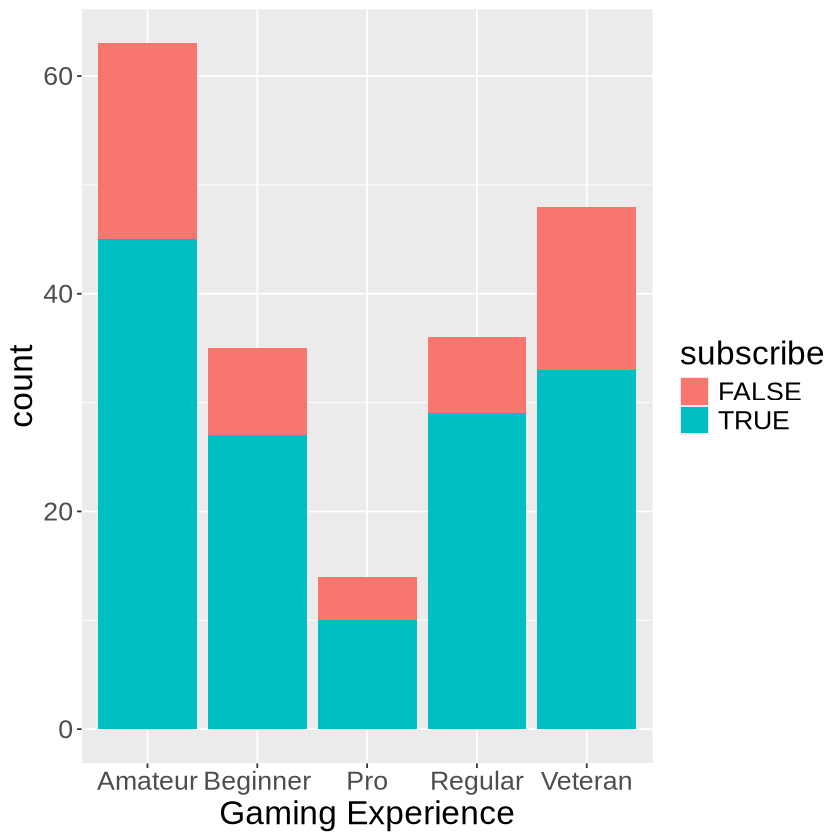

In [58]:
bar <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
        geom_bar() +
        xlab("Gaming Experience") +
        theme(text = element_text(size = 20))
bar

# Players Scatterplot: Played Hours vs. Age

## Untouched Plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


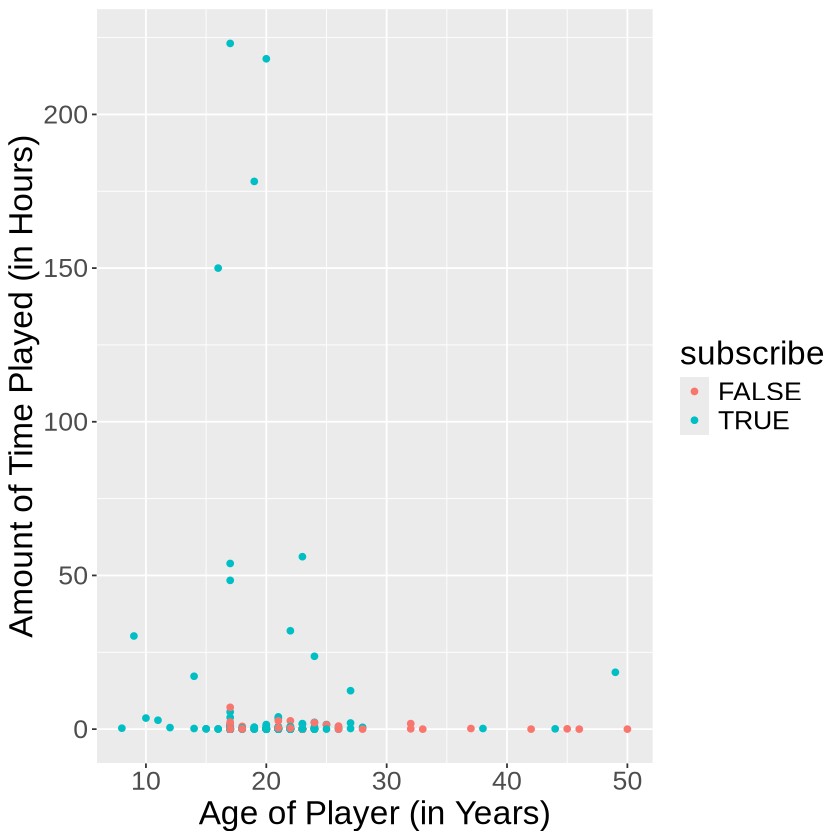

In [5]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe)) +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        theme(text = element_text(size = 20))
players_scatter
#log scale, upsample, age --< played hours

## Top Cut Off Plot

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


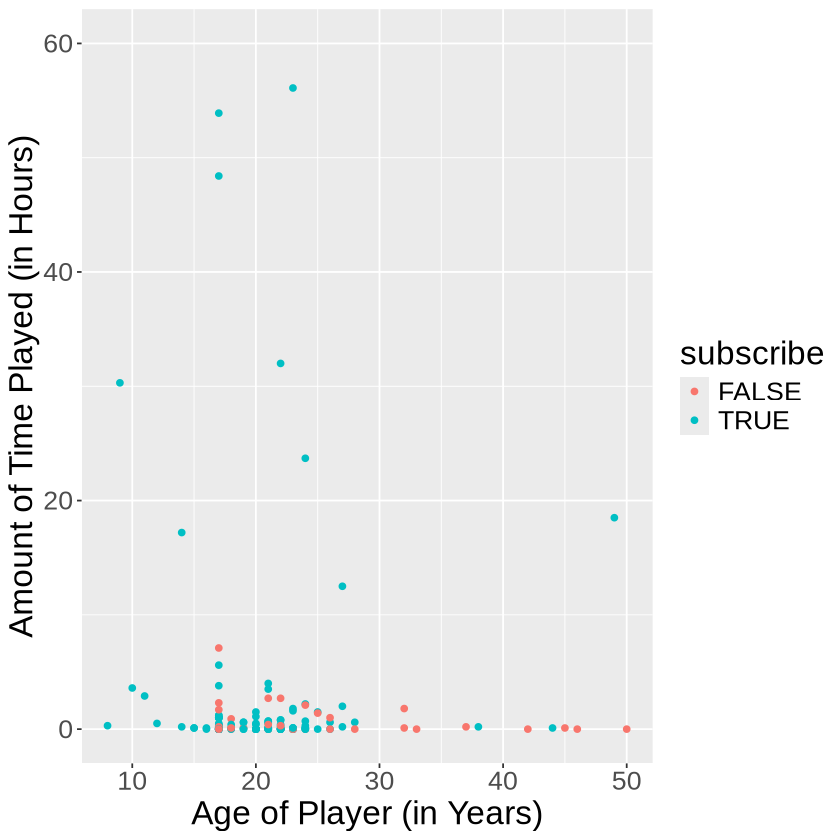

In [38]:
# Cut top of plot (but not data):
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe)) +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        ylim(0, 60) +
        theme(text = element_text(size = 20))
players_scatter

In [36]:
# Check how many observations are above 60 played hours (i.e. how many data points are not shown when the top of the plot is cut)
# I first did 100 and narrowed y-axis of the plot down to make it a good size.
players |> 
    filter(played_hours > 60) |>
    group_by(played_hours) |>
    summarize(count = n()) 

played_hours,count
<dbl>,<int>
150.0,1
178.2,1
218.1,1
223.1,1


## Log Scaled Plot

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


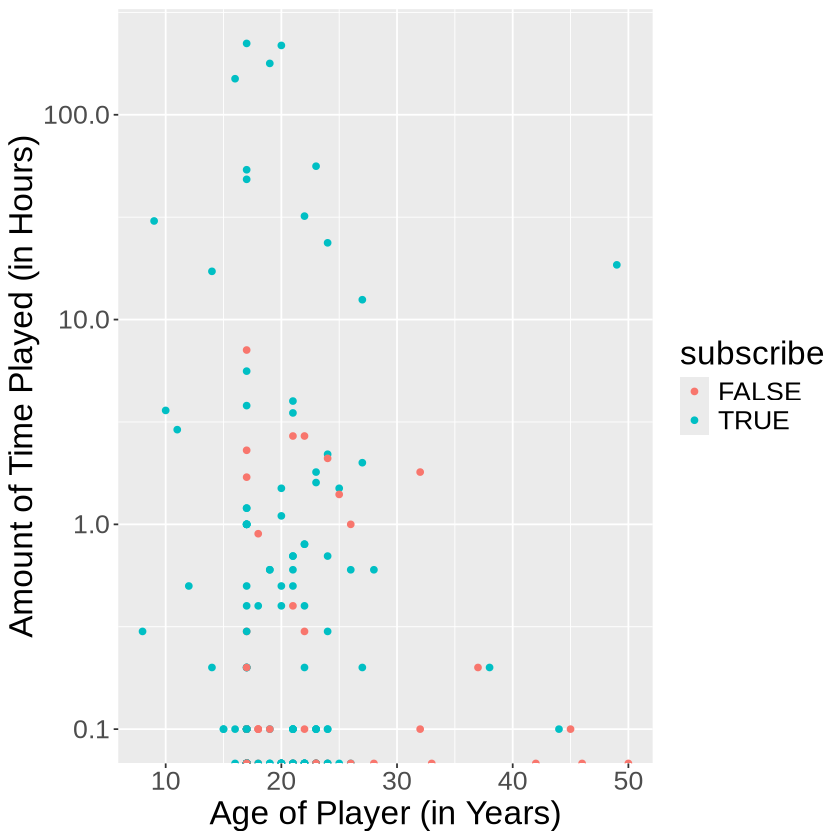

In [37]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe)) +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        scale_y_log10() +
        theme(text = element_text(size = 20))
players_scatter

# Line and Other Plots

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


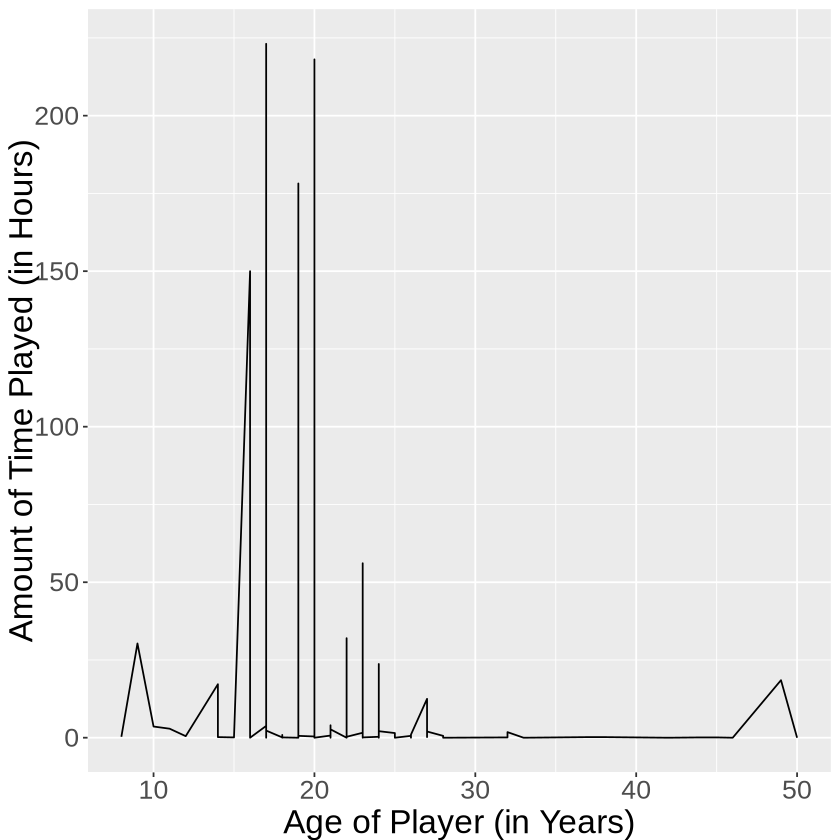

In [8]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_line() +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        theme(text = element_text(size = 20))
players_scatter

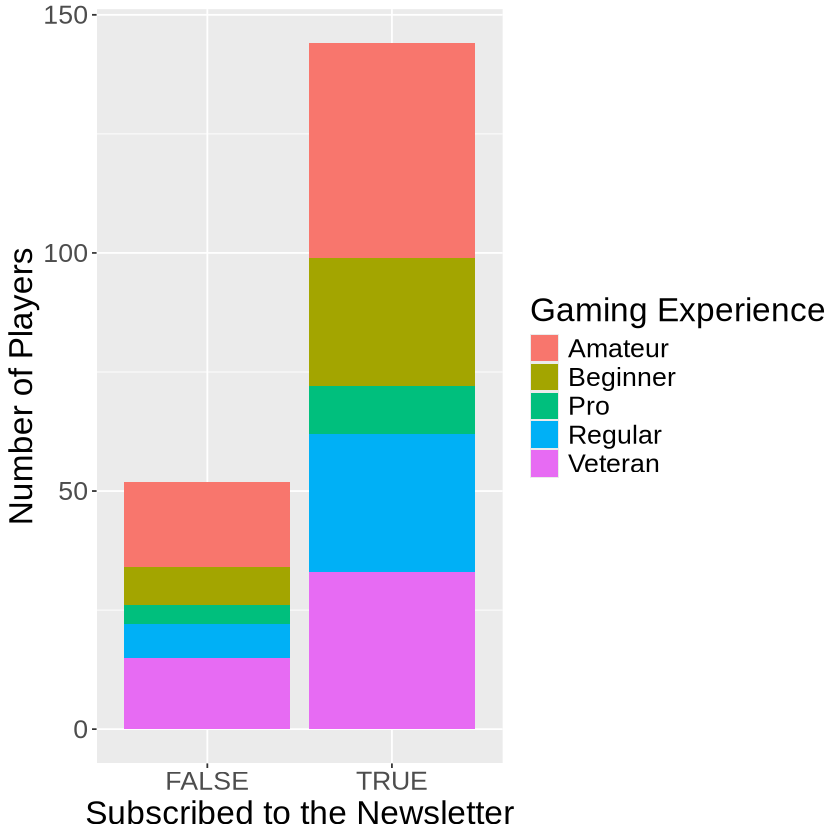

In [9]:
players_scatter <- players |>
    ggplot(aes(x = subscribe, fill = experience)) +
        geom_bar() +
        xlab("Subscribed to the Newsletter") +
        ylab("Number of Players") +
        labs(fill = "Gaming Experience") +
        theme(text = element_text(size = 20))
players_scatter

# Sessions Dataset

In [39]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


### **Total number of players (individual emails) present in the data frame**

In [43]:
sessions |>
group_by(hashedEmail) |>
    summarize(count = n()) |>
    dim()

[1] 125   2

**Description:**

The dataset contains the the start and end times of all individual play sessions for each player.  There are 5 variables and 1535 observations in the dataset.  

In [11]:
player_joined <- semi_join(players, sessions)
player_joined

# Can we use functions we haven't learned before like inner_join?
# What does it mean for the second question: "Contribute a large amount of data"?
# Is this a good data analysis Q that I am doing: Can subscription and total number of played hours (not the individual play session hours) predict
        # experience level?    Would this fit under question 2?  so that knowing this information can help see the players contributing data??
# How would we know if the relation between variables is - prediction or just correlation?
# Is it correct that I use semijoin to make sure that the players from both datasets are present?
# Do we need to submit our draft work and exploration processes?
# Why are there 196 players in the first players dataset and 125 players inside the sessions set (I found out when I grouped the emails together to see how many people are inside it)
# Discrepency: Dana's email -->  fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d	

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Convert string to datetime type and create a new column for Time Duration:

In [45]:
sessions_mutated <- sessions |>
    mutate(start_time = as_datetime(start_time)) |>
    mutate(end_time = as_datetime(end_time)) |>
    mutate(time_duration = abs(end_time - start_time))
sessions_mutated

hashedEmail,start_time,end_time,original_start_time,original_end_time,time_duration
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<drtn>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12,12 secs
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12,13 secs
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12,23 secs
⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,1.72218e+12,1.72218e+12,21 secs
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,1.72189e+12,1.72189e+12,7 secs
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,1.71617e+12,1.71617e+12,19 secs


### Find the Maximum, Total and Mean Time Durations:

In [46]:
# Finding the top 5 players for the longest session ever played
sessions_max_time <- sessions_mutated |>
    group_by(hashedEmail) |>
    summarize(max_time = max(time_duration, na.rm = TRUE)) |>
    slice_max(max_time, n = 5)

# Finding the top 5 players for the greatest total amount of time spent on the server
sessions_total_time <- sessions_mutated |>
    group_by(hashedEmail) |>
    summarize(total_time = sum(time_duration, na.rm = TRUE)) |>
    slice_max(total_time, n = 5)
sessions_total_time

# Finding the top 5 players for the average amount of time in each playing session.  A repeat is down below.
sessions_average_time <- sessions_mutated |>
    group_by(hashedEmail) |>
    summarize(mean_time = mean(time_duration, na.rm = TRUE)) |>
    merge(players)
sessions_average_time

hashedEmail,total_time
<chr>,<drtn>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,1417212900 secs
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,1385845277 secs
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,1038698205 secs
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,441671311 secs
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,347151187 secs


hashedEmail,mean_time,experience,subscribe,played_hours,name,gender,Age
<chr>,<drtn>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,15767333 secs,Regular,TRUE,1.5,Isaac,Male,20
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30 secs,Pro,FALSE,0.4,Lyra,Male,21
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11 secs,Beginner,TRUE,0.1,Osiris,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,407470.4 secs,Amateur,TRUE,56.1,Dana,Male,23
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.0 secs,Amateur,TRUE,0.1,Fatima,Male,17
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.0 secs,Beginner,TRUE,1.1,Caden,Male,20


### Semi-join the datasets, and arrange from highest to lowest hours played:

In [13]:
max_time_session_joined <- semi_join(players, sessions_total_time) |>
    arrange(desc(played_hours))
max_time_session_joined

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9


### Arrange the players dataset from highest to lowest hours played and compare with the dataset from above:

In [14]:
players |>
    slice_max(played_hours, n = 5)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23


In [16]:
# Finding the top 5 players for the average amount of time in each playing session
sessions_average_time <- sessions_mutated |>
    group_by(hashedEmail) |>
    summarize(mean_time = mean(time_duration, na.rm = TRUE))
sessions_average_time

sessions_joined <- semi_join(sessions_average_time, players)
sessions_joined

# players_time <- bind_cols(sessions_joined, players)
# players_time

hashedEmail,mean_time
<chr>,<drtn>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,15767333 secs
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30 secs
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11 secs
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,407470.4 secs
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.0 secs
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.0 secs


Joining with `by = join_by(hashedEmail)`


hashedEmail,mean_time
<chr>,<drtn>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,15767333 secs
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,30 secs
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,11 secs
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,407470.4 secs
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,9.0 secs
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,72.0 secs


# Analysis Start! # 

In [17]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [18]:
players_split <- initial_split(players, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [19]:
players_recipe <- recipe(played_hours ~ Age, data = players_training)


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


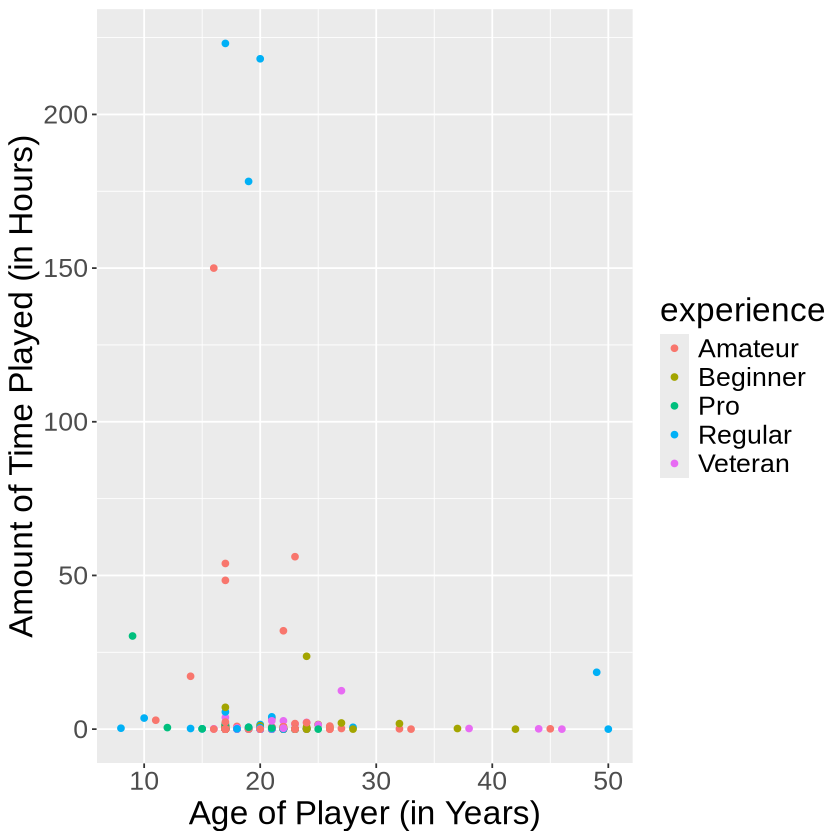

In [20]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = experience)) +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        theme(text = element_text(size = 20))
players_scatter